In [1]:
import umap
from sklearn.manifold import TSNE
import numpy as np
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from sklearn.decomposition import PCA
from hdimvis.visualise_layouts_and_metrics.plot import show_generation_metrics,show_layout
from  sklearn.manifold import SpectralEmbedding, MDS
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from experiments.utils.LayoutHistogram import LayoutHistogram
from experiments.utils.layout_shannon_entropy import calculate_entropy
from hdimvis.metrics.stress.stress import vectorised_stress
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean,manhattan
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from pathlib import Path
from plot import show_original_globe
from plot import show_globe_embedding


####################
Fetching the "globe" dataset
####################
Dataset loaded
Dataset shape: (7003, 3)
####################


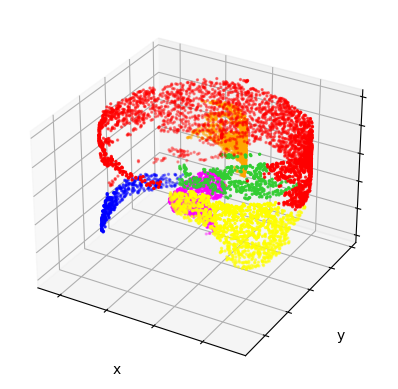

In [2]:
roll = DataFetcher.fetch_data('globe', size=7000, swiss_roll =True, revolutions=2)
show_original_globe(roll)

In [3]:
embedding_PCA = PCA(n_components=2, whiten=False, copy=True).fit_transform(roll.data).astype(np.float64)
embedding_PCA *= 10/np.std(embedding_PCA)

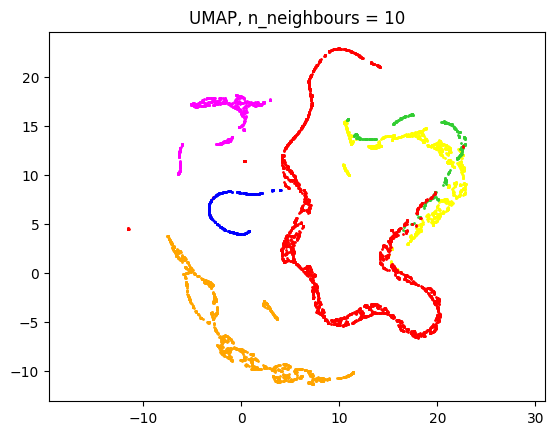

In [5]:
embedding_umap = umap.UMAP(n_neighbors=10).fit_transform(roll.data)
show_globe_embedding(dataset=roll, points_2d=embedding_umap, title="UMAP, n_neighbours = 10")

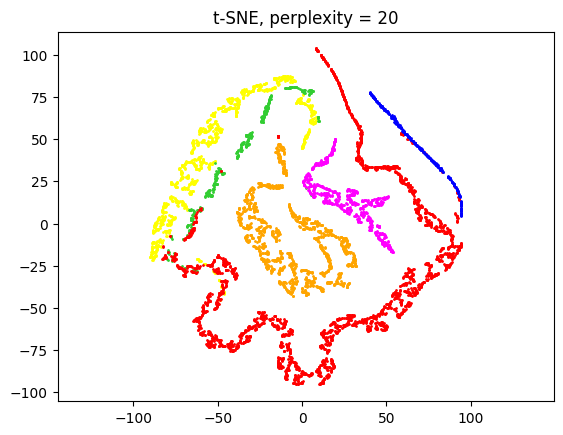

In [6]:
embedding_tsne = TSNE(n_components=2, perplexity=20).fit_transform(roll.data)
show_globe_embedding(dataset=roll, points_2d=embedding_tsne, title="t-SNE, perplexity = 20")

####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "globe" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 3
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################


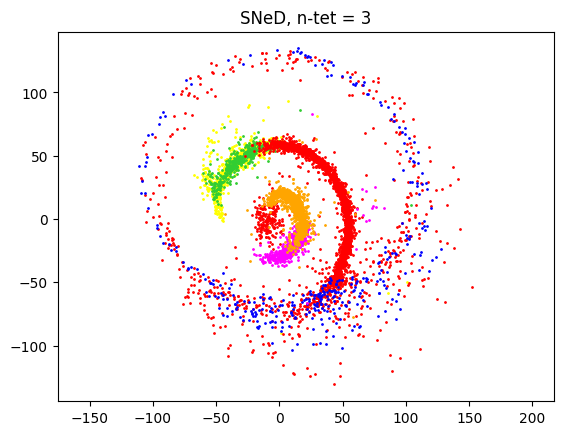

In [4]:
sned = SNeD(dataset=roll, initial_layout=None, ntet_size=3)
layout_squad = LayoutCreation.create_layout(sned, no_iters=1000, optional_metric_collection=None)
show_globe_embedding(dataset=roll, points_2d=layout_squad.get_final_positions(), title="SNeD, n-tet = 3")

####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "globe" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.4 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


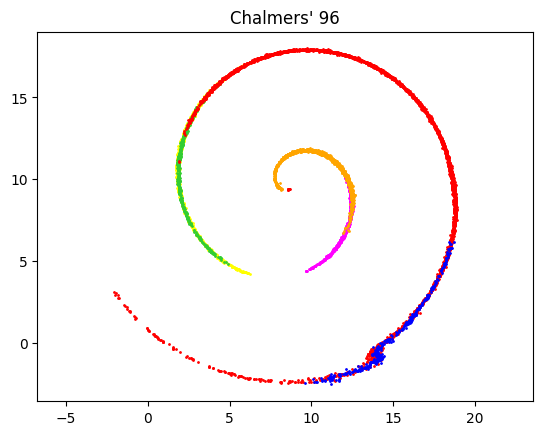

####################
A 2D layout of the "globe" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.4 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


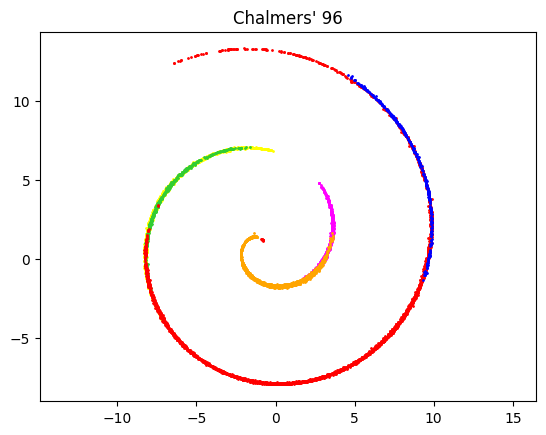

In [13]:
algo96 = Chalmers96(dataset=roll, initial_layout=embedding_PCA,  distance_fn=euclidean,
                    damping_constant=0, spring_constant=0.4,
                    use_knnd=False, sample_set_size=10, neighbour_set_size=5)


layout_96 = LayoutCreation().create_layout(algo96, optional_metric_collection=None, no_iters=100)
show_globe_embedding(dataset=roll, points_2d=layout_96.get_final_positions(), title="Chalmers' 96")